In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("C:/Users/Ruchita/Downloads/Datascience/smartphones.csv")

In [3]:
df.head()

,Name,OS,Capacity,Ram,Weight,Company,inch
0,Galaxy S8,Android,64,4,149.0,Samsung,5.8
1,Lumia 950,windows,32,3,150.0,Microsoft,5.2
2,Xpreia L1,Android,16,2,180.0,Sony,5.5
3,iphone 7,ios,128,2,138.0,Apple,4.7
4,U Ultra,Android,64,4,170.0,HTC,5.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      9 non-null      object 
 1   OS        9 non-null      object 
 2   Capacity  9 non-null      int64  
 3   Ram       9 non-null      int64  
 4   Weight    9 non-null      float64
 5   Company   9 non-null      object 
 6   inch      9 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 632.0+ bytes


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['OS']=le.fit_transform(df['OS'])
df['Company']=le.fit_transform(df['Company'])
df['Name']=le.fit_transform(df['Name'])

In [6]:
from sklearn.preprocessing import MinMaxScaler
dfn=MinMaxScaler().fit_transform(df)
dfn

array([[0.125     , 0.        , 0.42857143, 1.        , 0.54411765,
        0.83333333, 1.        ],
       [0.25      , 1.        , 0.14285714, 0.66666667, 0.55882353,
        0.5       , 0.66666667],
       [0.75      , 0.        , 0.        , 0.33333333, 1.        ,
        1.        , 0.83333333],
       [1.        , 0.5       , 1.        , 0.33333333, 0.38235294,
        0.        , 0.38888889],
       [0.625     , 0.        , 0.42857143, 1.        , 0.85294118,
        0.33333333, 0.94444444],
       [0.        , 0.        , 0.        , 0.33333333, 0.48529412,
        0.83333333, 0.61111111],
       [0.875     , 0.5       , 0.14285714, 0.        , 0.        ,
        0.        , 0.        ],
       [0.375     , 0.        , 0.        , 0.66666667, 0.47794118,
        0.66666667, 0.55555556],
       [0.5       , 0.        , 1.        , 1.        , 0.45588235,
        0.16666667, 0.55555556]])

In [7]:
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=3)
nbrs=neigh.fit(dfn)
print(nbrs)
distances, indices=nbrs.kneighbors(dfn)


NearestNeighbors(n_neighbors=3)


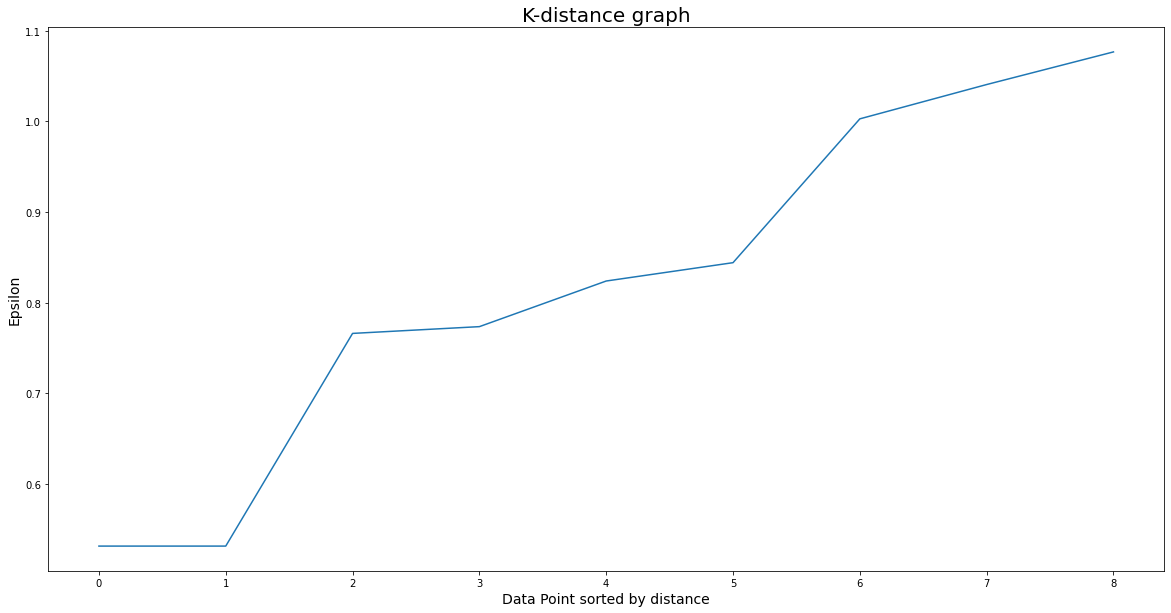

In [8]:
plt.figure(figsize=(20,10))
distances=np.sort(distances, axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.title('K-distance graph', fontsize=20)
plt.xlabel('Data Point sorted by distance', fontsize=14)
plt.ylabel('Epsilon', fontsize=14)
plt.show()

In [9]:
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=1,min_samples=6)
model.fit(dfn)

DBSCAN(eps=1, min_samples=6)

In [10]:
model.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [11]:
Cluster=model.labels_
df['DB_Cluster']=Cluster
df

,Name,OS,Capacity,Ram,Weight,Company,inch,DB_Cluster
0,1,0,64,4,149.0,5,5.8,-1
1,2,2,32,3,150.0,3,5.2,-1
2,6,0,16,2,180.0,6,5.5,-1
3,8,1,128,2,138.0,0,4.7,-1
4,5,0,64,4,170.0,2,5.7,-1
5,0,0,16,2,145.0,5,5.1,-1
6,7,1,32,1,112.0,0,4.0,-1
7,3,0,16,3,144.5,4,5.0,-1
8,4,0,128,4,143.0,1,5.0,-1
